In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.shape

(400, 5)

In [9]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [17]:
data.describe(include = 'O').T

,count,unique,top,freq
Gender,400,2,Female,204


In [42]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

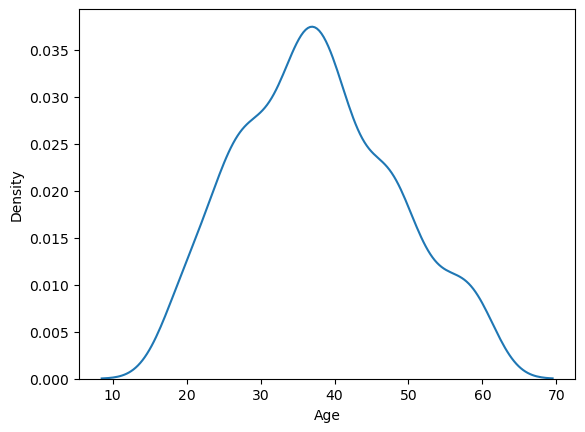

In [46]:
sns.kdeplot(data=data, x="Age")
plt.show()

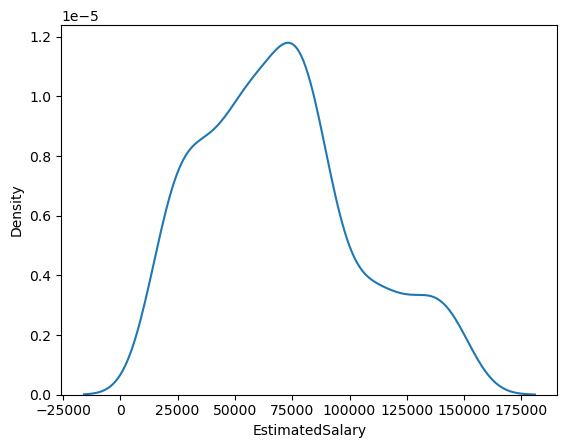

In [40]:
sns.kdeplot(data=data, x="EstimatedSalary")
plt.show()

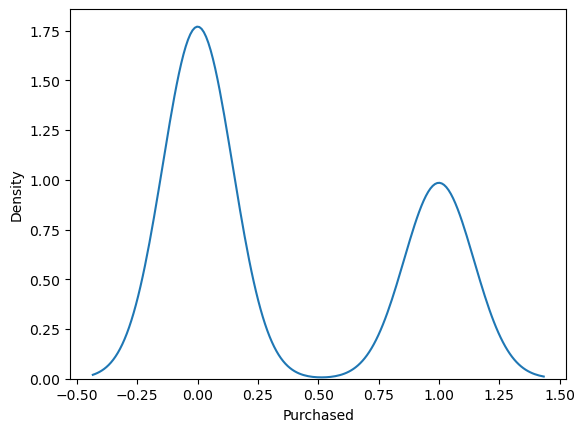

In [58]:
sns.kdeplot(data=data, x="Purchased")
plt.show()

## Correlation HeatMap

In [106]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

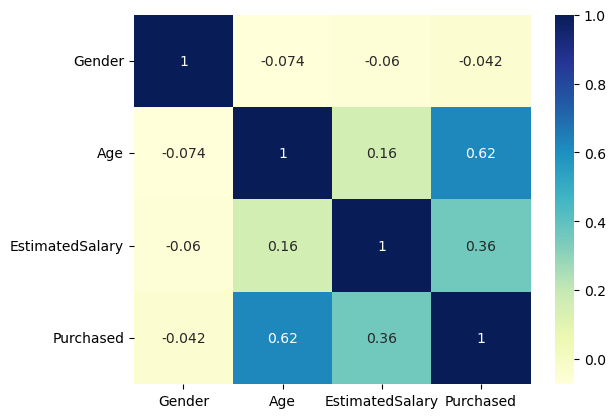

In [114]:
columns = ['Gender', 'Age', 'EstimatedSalary', 'Purchased']
subset = data[columns]
corr_matrix = subset.corr()
dataplot = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

## Label Encoding for Gender Feature

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

## Splitting into Train and Test

In [89]:
x= data.iloc[:,:-1].values
y= data.iloc[:, -1].values

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [93]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## Feature Scalling

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [97]:
x_test = sc.transform(x_test)

## Hyperparameter Tunning for a Support Vector Machine model using scikit_learn and GridSearchCV

In [123]:
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split, GridSearchCV

svm_model = SVC()
param_grid = { 
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'sigmoid'],
    'gamma': [0.01, 0.1, 1, 'scale']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             scoring='accuracy')

## Train the model

In [128]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             scoring='accuracy')

## Best Parameter 

In [131]:
print(grid_search.best_params_)
Best_Hyperparameters = grid_search.best_params_
Best_Hyperparameters

{'C': 10, 'gamma': 1, 'kernel': 'poly'}


{'C': 10, 'gamma': 1, 'kernel': 'poly'}

## Accuracy of the test model

In [146]:
from sklearn.metrics import confusion_matrix
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.95


## Confusion Matrix

In [149]:
y_pred = best_model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [151]:
print(cm)

[[62  1]
 [ 4 33]]


## Visualizing the Confusion Matrix

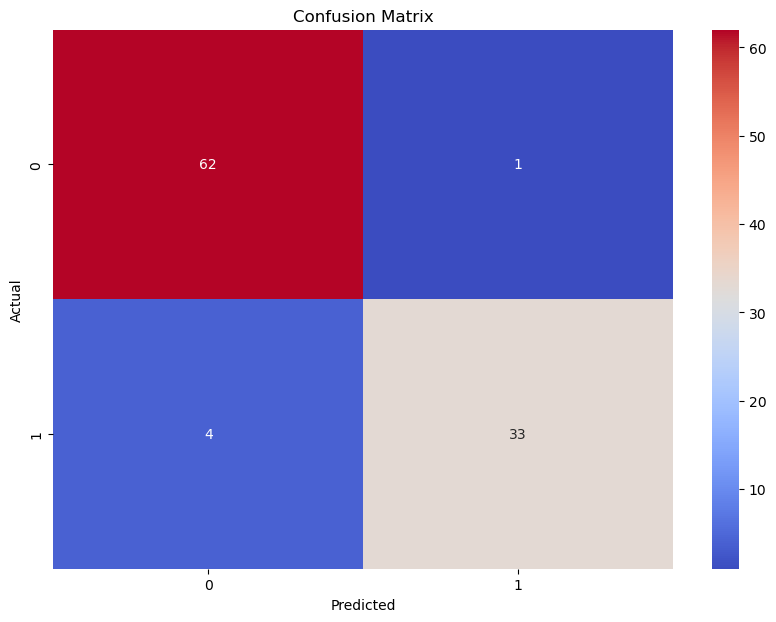

In [154]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d', cmap ='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()